In [1]:
import os

In [2]:
os.chdir("/Users/ariedamuco/Desktop/Booth")

Let's do some preprocessing, similar what we have seen previously in the course. Now, however we use the NLTK library, `string` and stem the words. Stemming will get the common root of a word. 

In [3]:
os.listdir()

['.DS_Store',
 'Input',
 'Output',
 'Code',
 'Slides',
 '.gitignore',
 'Figures',
 '.git']

In [4]:
#http://www.nltk.org/book/ch01.html
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize

In [11]:
def preprocessing_text(text):
    words = word_tokenize(text.lower())
    tokens = [word for word in words if word not in string.punctuation]
    stop_words = stopwords.words('english')
    tokens = [token for token in tokens if token not in  stop_words]
    stemmer = LancasterStemmer()
    tokens_lematized = [stemmer.stem(word) for word in tokens]
    preprocessed_text = ' '.join(tokens_lematized)
    return preprocessed_text 

Let's read the file with motivational content. These are short sentences. The purpose is so  that we can see the Tfidf more clearly.

In [6]:
text1 = open('Input/Motivational1.txt').read()
text2 = open('Input/Motivational2.txt').read()
text3 = open('Input/Motivational3.txt').read()
text4 = open('Input/Motivational4.txt').read()

In [7]:
list_text = [text1, text2, text3, text4]

In [9]:
text1

'Develop success from failures. Discouragement and failure are two of the surest stepping stones to success'

In [10]:
text2

'It is better to fail in originality than to succeed in imitation.\n\n'

In [8]:
list_text

['Develop success from failures. Discouragement and failure are two of the surest stepping stones to success',
 'It is better to fail in originality than to succeed in imitation.\n\n',
 'Learn from yesterday, live for today, hope for tomorrow. The important thing is not to stop questioning.',
 'Start where you are. Use what you have. Do what you can.\n\n']

In [16]:
word_list = []
for line in list_text:
    word_list.append(preprocessing_text(line))
word_list

['develop success fail disco fail two surest step ston success',
 'bet fail origin success imit',
 'learn yesterday liv today hop tomorrow import thing stop quest',
 'start us']

In [17]:
len(set(word_list[0].split()+word_list[1].split()+word_list[2].split()+word_list[3].split()))

23

In [20]:
vectorizer = TfidfVectorizer(preprocessor=preprocessing_text)
# ngram_range=(1,3),stop_words='english'
#ngram_range=(1,3)

In [78]:
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2',
                preprocessor=<function reprocessing_text at 0x7fca1aa93e18>,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [23]:
doc_vector = vectorizer.fit_transform(list_text)

In [24]:
doc_vector.shape

(4, 23)

In [25]:
doc_vector

<4x23 sparse matrix of type '<class 'numpy.float64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [26]:
doc_vector.toarray()

array([[0.        , 0.30188562, 0.30188562, 0.47602018, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.30188562, 0.30188562, 0.        ,
        0.47602018, 0.30188562, 0.        , 0.        , 0.        ,
        0.30188562, 0.        , 0.        ],
       [0.48546061, 0.        , 0.        , 0.38274272, 0.        ,
        0.48546061, 0.        , 0.        , 0.        , 0.48546061,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.38274272, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.31622777,
        0.        , 0.31622777, 0.31622777, 0.31622777, 0.        ,
        0.31622777, 0.        , 0.        , 0.        , 0.31622777,
        0.        , 0.        , 0.31622777, 0.31622777, 0.31622777,
        0.        , 0.        , 0.31622777],
       [0.        , 0.        , 0.        , 0.   

In [27]:
doc_vector.toarray().transpose()

array([[0.        , 0.48546061, 0.        , 0.        ],
       [0.30188562, 0.        , 0.        , 0.        ],
       [0.30188562, 0.        , 0.        , 0.        ],
       [0.47602018, 0.38274272, 0.        , 0.        ],
       [0.        , 0.        , 0.31622777, 0.        ],
       [0.        , 0.48546061, 0.        , 0.        ],
       [0.        , 0.        , 0.31622777, 0.        ],
       [0.        , 0.        , 0.31622777, 0.        ],
       [0.        , 0.        , 0.31622777, 0.        ],
       [0.        , 0.48546061, 0.        , 0.        ],
       [0.        , 0.        , 0.31622777, 0.        ],
       [0.        , 0.        , 0.        , 0.70710678],
       [0.30188562, 0.        , 0.        , 0.        ],
       [0.30188562, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.31622777, 0.        ],
       [0.47602018, 0.38274272, 0.        , 0.        ],
       [0.30188562, 0.        , 0.        , 0.        ],
       [0.        , 0.        ,

In [28]:
df = pd.DataFrame(doc_vector.toarray().transpose(), index=vectorizer.get_feature_names())

In [29]:
df

0         1         2         3
bet        0.000000  0.485461  0.000000  0.000000
develop    0.301886  0.000000  0.000000  0.000000
disco      0.301886  0.000000  0.000000  0.000000
fail       0.476020  0.382743  0.000000  0.000000
hop        0.000000  0.000000  0.316228  0.000000
imit       0.000000  0.485461  0.000000  0.000000
import     0.000000  0.000000  0.316228  0.000000
learn      0.000000  0.000000  0.316228  0.000000
liv        0.000000  0.000000  0.316228  0.000000
origin     0.000000  0.485461  0.000000  0.000000
quest      0.000000  0.000000  0.316228  0.000000
start      0.000000  0.000000  0.000000  0.707107
step       0.301886  0.000000  0.000000  0.000000
ston       0.301886  0.000000  0.000000  0.000000
stop       0.000000  0.000000  0.316228  0.000000
success    0.476020  0.382743  0.000000  0.000000
surest     0.301886  0.000000  0.000000  0.000000
thing      0.000000  0.000000  0.316228  0.000000
today      0.000000  0.000000  0.316228  0.000000
tomorrow   0.000000  0.000000  0.316228  0.000000
two        0.301886  0.000000  0.000000  0.000000
us         0.000000  0.000000  0.000000  0.707107
yesterday  0.000000  0.000000  0.316228  0.000000

In [30]:
df.columns = ['text1', 'text2', 'text3', 'text4']

In [31]:
df

text1     text2     text3     text4
bet        0.000000  0.485461  0.000000  0.000000
develop    0.301886  0.000000  0.000000  0.000000
disco      0.301886  0.000000  0.000000  0.000000
fail       0.476020  0.382743  0.000000  0.000000
hop        0.000000  0.000000  0.316228  0.000000
imit       0.000000  0.485461  0.000000  0.000000
import     0.000000  0.000000  0.316228  0.000000
learn      0.000000  0.000000  0.316228  0.000000
liv        0.000000  0.000000  0.316228  0.000000
origin     0.000000  0.485461  0.000000  0.000000
quest      0.000000  0.000000  0.316228  0.000000
start      0.000000  0.000000  0.000000  0.707107
step       0.301886  0.000000  0.000000  0.000000
ston       0.301886  0.000000  0.000000  0.000000
stop       0.000000  0.000000  0.316228  0.000000
success    0.476020  0.382743  0.000000  0.000000
surest     0.301886  0.000000  0.000000  0.000000
thing      0.000000  0.000000  0.316228  0.000000
today      0.000000  0.000000  0.316228  0.000000
tomorrow   0.000000  0.000000  0.316228  0.000000
two        0.301886  0.000000  0.000000  0.000000
us         0.000000  0.000000  0.000000  0.707107
yesterday  0.000000  0.000000  0.316228  0.000000

In [32]:
freq = df.iloc[:,0].sort_values(ascending=False, inplace=False)

In [33]:
freq

fail         0.476020
success      0.476020
two          0.301886
develop      0.301886
disco        0.301886
surest       0.301886
ston         0.301886
step         0.301886
yesterday    0.000000
liv          0.000000
hop          0.000000
imit         0.000000
import       0.000000
learn        0.000000
start        0.000000
origin       0.000000
quest        0.000000
us           0.000000
stop         0.000000
thing        0.000000
today        0.000000
tomorrow     0.000000
bet          0.000000
Name: text1, dtype: float64

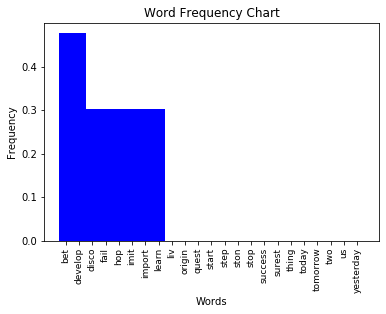

In [34]:
words = df.index
xvalues = np.arange(len(df.index))
width = 1.0
ax = plt.axes(frameon=True)
ax.set_xticks(xvalues)
ax.set_xticklabels(words, rotation='vertical', fontsize=9)
ax.set_title('Word Frequency Chart')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
plt.bar(xvalues,freq, width, color='b' )
plt.show()

In [36]:
#coocurrence matrix
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
count_model = CountVectorizer(ngram_range=(1,1), stop_words='english')

In [38]:
docs_unigram = count_model.fit_transform(word_list)

In [39]:
docs_unigram

<4x21 sparse matrix of type '<class 'numpy.int64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [40]:
docs_unigram.todense()

matrix([[0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [41]:
docs_unigram_matrix = (docs_unigram.T * docs_unigram)

In [42]:
docs_unigram_matrix.setdiag(0)

In [43]:
#docs_unigram_matrix.todense()

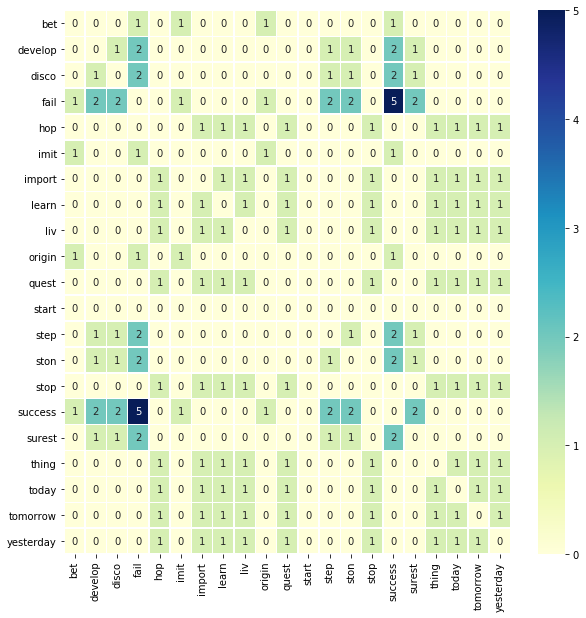

In [44]:
import seaborn as sns
df = pd.DataFrame(docs_unigram_matrix.todense(), index = count_model.get_feature_names())
df.columns = count_model.get_feature_names()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df,annot=True,linewidths=.5, cmap="YlGnBu")

### References
https://en.wikipedia.org/wiki/Sparse_matrix

https://machinelearningmastery.com/sparse-matrices-for-machine-learning/

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

https://en.wikipedia.org/wiki/N-gram

https://scikit-learn.org/stable/